# <center>**HOUSE PRICE PREDICTION**<center>

* Cleaned the data. Selected certain features based on intuition and analysing the available dataset.
* Suitable model and parameters are selected using Gridsearchcv. And **linear regression** is found to be better one, with an accuracy of **83%**.
* Demmo: - At the end of notebook do input the values of LOCATION in bengaluru, BHK, AREA(square feet) and number of BATHROOMS to predict the price of the house.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png"/>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('BHP_data.csv')
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


<br>

<br>

# Feature Selection and Data Cleaning

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


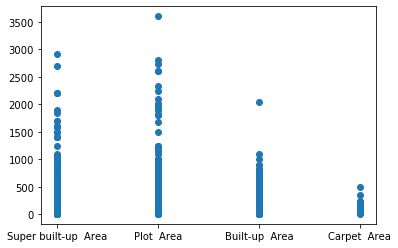

In [5]:
print(df1.area_type.value_counts())
plt.scatter(df1.area_type, df1.price)

In [6]:
# df1.groupby('society').price.mean().nsmallest(20/
# df1.groupby('society').price.mean().nlargest(20)

<br>

In [7]:
df1.loc[df1.price > 3500,:]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,NaN,7150,13.0,NaN,3600.0


In [8]:
df1.drop([4162],inplace=True)

In [9]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [10]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk'] =df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3.bhk > 26]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
sqft_to_num('2006-1500')

1753.0

In [20]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(sqft_to_num)

In [21]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [22]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

In [23]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [24]:
df4 = df4.dropna()

In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5.price*100000/df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df5.location = df5.location.apply(lambda x : x.strip())
df5.location.value_counts()

Whitefield           533
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       264
Thanisandra          235
                    ... 
Geetanjali Layout      1
Williams Town          1
Chikkanahalli          1
Punappa Layout         1
SHANTHINAGAR           1
Name: location, Length: 1287, dtype: int64

In [27]:
locat = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
locat

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [28]:
len(locat[locat<=20])

1144

In [29]:
locat_less_than_20 = locat[locat<=20]
locat_less_than_20

location
Yelachenahalli          20
Poorna Pragna Layout    20
Binny Pete              20
HBR Layout              20
Sanjay nagar            20
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1144, dtype: int64

In [30]:
print(len(df5.location.unique()))
print(len(locat_less_than_20))

1287
1144


In [31]:
df5.location = df5.location.apply(lambda x : 'other' if x in locat_less_than_20 else x)

In [32]:
len(df5.location.unique())

144

In [33]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

In [36]:
df6.price_per_sqft.describe()

count     12455.000000
mean       6306.658008
std        4163.206087
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
df6.price.describe()

count    12455.000000
mean       111.032294
std        151.214651
min          9.000000
25%         49.000000
50%         70.000000
75%        115.000000
max       3600.000000
Name: price, dtype: float64

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10429, 7)

In [39]:
df7.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667


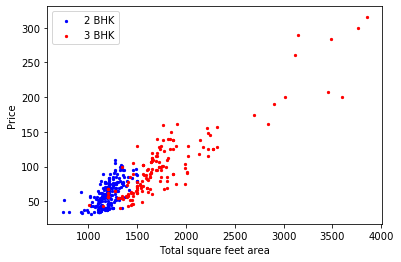

In [40]:
def plot_scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft, bhk2.price,color = 'blue',label='2 BHK',s=5)
    plt.scatter(bhk3.total_sqft, bhk3.price,color = 'red',label='3 BHK',s=5)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.legend()
    
plot_scatter_plot(df7,"Whitefield")

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std' :np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft) < (stats['mean'])].index.values) 
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(6971, 7)

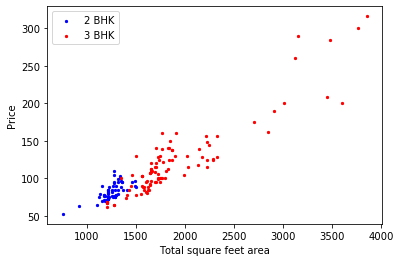

In [42]:
plot_scatter_plot(df8,"Whitefield")

Text(0, 0.5, 'Count')

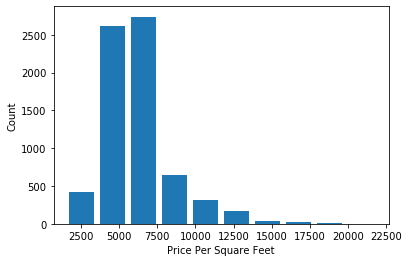

In [43]:
import matplotlib
plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [44]:
df8.bath.unique()

array([ 3.,  5.,  4.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7819,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
7962,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9040,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9213,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9552,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

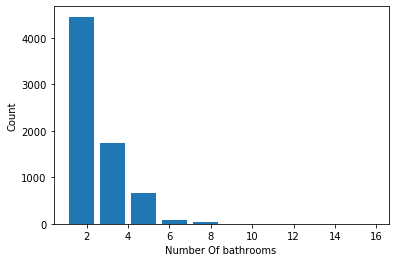

In [46]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number Of bathrooms")
plt.ylabel("Count")

In [47]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5810,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7697,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9913,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [48]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6892, 7)

In [49]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2


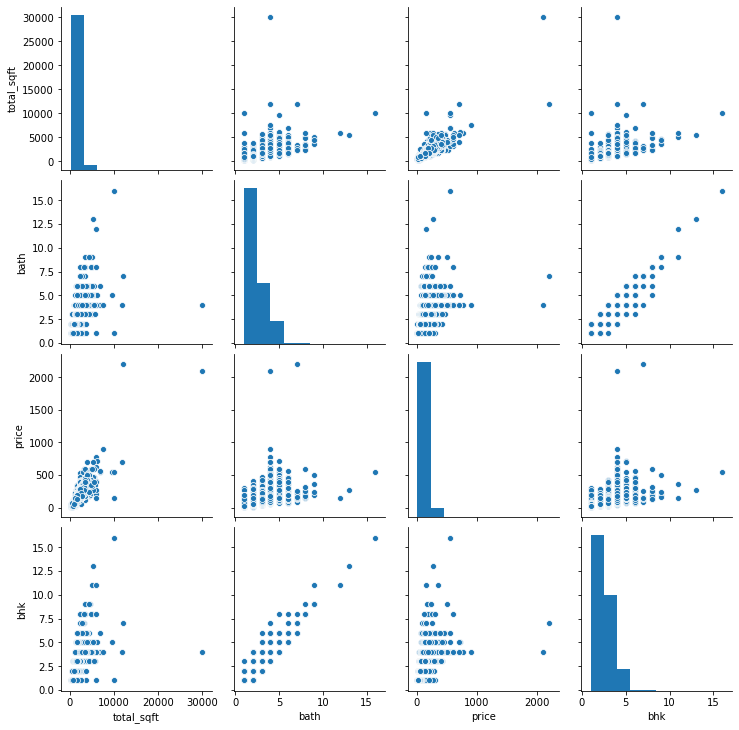

In [50]:
sns.pairplot(df10)

In [51]:
# cols = ['total_sqft','bath','bhk','price']
# from sklearn.preprocessing import StandardScaler
# stdsc = StandardScaler()
# X_std = stdsc.fit_transform(df10[cols].iloc[:,range(0,4)].values)
# cov_mat = np.cov(X_std.T)

# plt.figure(figsize=(8,8))
# sns.set(font_scale=1.5)
# hm = sns.heatmap(cov_mat,
#                  cbar=True,
#                  annot=True,
#                  square=True,
#                  fmt='.2f',
#                  annot_kws={'size': 12},
#                  yticklabels=cols,
#                  xticklabels=cols)
# plt.title('Covariance matrix showing correlation coefficients')
# plt.tight_layout()
# plt.show()

<br>

In [52]:
dummies = pd.get_dummies(df10.location)
dummies.head(2)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11 =pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.drop('location',axis='columns',inplace=True)
df11.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.0,3.0,225.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>

# Model Selection

In [54]:
X = df11.drop('price',axis='columns')
y = df11['price']

In [ ]:
def find_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{'normalize':[True,False]}
                            },
        'lasso':{
            'model':Lasso(),
            'params':{'alpha':[1,2],'selection':['random','cyclic']}
                },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}
                },
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(X,y)

#### Linear regression is found to be better model than the other two with an accuracy between 81% and 84%

<br>

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X,y)

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lin_model.predict([x])[0]

In [ ]:
with open('model.pkl','wb') as f:
    pickle.dump(lin_model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

<br>

Uncomment the following lines and input proper values to get the expected price of the house.

In [ ]:
# locat_ = input('Choose a location in bengaluru from the above list: ')
# area_ = input('Area of the house floor in sqft.: ')
# bath_ = input('Number of bathrooms: ')
# bhk_ = input('BHK : ')
# print('Price of the house of your choice in lakhs is: ',predict_price(locat_,area_,bath_,bhk_))